# Ensemble Techniques

ABC, a leading market research agency in Delhi, conducted a primary household survey in the Delhi region for an FI client planning to launch its financial products. The objective of the survey was to study the socio-economic status of the people living in the Delhi Development Authority flats. A total 29,834 respondents were interviewed. ABC wants to determine the factors that influence the monthly income of the respondents, so that it will help its client to streamline its marketing strategy.

## Question 1. Analyse the data (descriptive statistics and visualization)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("survey_ncr.csv")
data.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,47,Private,10th,6,Executive,Unmarried,ST,Female,45,less than 30 k INR
1,40,Private,10th,6,Mechanic,Unmarried,ST,Male,40,less than 30 k INR
2,30,Private,10th,6,Other-service,Unmarried,ST,Male,40,less than 30 k INR
3,27,Private,10th,6,Taxi-driver,Unmarried,ST,Male,75,less than 30 k INR
4,38,Private,10th,6,Driver,Unmarried,Christians,Female,40,less than 30 k INR


In [3]:
data.income.unique()

array(['less than 30 k INR', 'more than 30 k INR'], dtype=object)

In [9]:
data.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29834 entries, 0 to 29833
Data columns (total 10 columns):
age               29834 non-null int64
job_type          29834 non-null object
education         29834 non-null object
education_num     29834 non-null int64
job               29834 non-null object
marital_status    29834 non-null object
religion          29834 non-null object
gender            29834 non-null object
hours_per_week    29834 non-null int64
income            29834 non-null object
dtypes: int64(3), object(7)
memory usage: 2.3+ MB


In [10]:
data.shape

(29834, 10)

In [11]:
data.isnull().sum()

age               0
job_type          0
education         0
education_num     0
job               0
marital_status    0
religion          0
gender            0
hours_per_week    0
income            0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29834 entries, 0 to 29833
Data columns (total 10 columns):
age               29834 non-null int64
job_type          29834 non-null object
education         29834 non-null object
education_num     29834 non-null int64
job               29834 non-null object
marital_status    29834 non-null object
religion          29834 non-null object
gender            29834 non-null object
hours_per_week    29834 non-null int64
income            29834 non-null object
dtypes: int64(3), object(7)
memory usage: 2.3+ MB


In [13]:
data.describe()

,age,education_num,hours_per_week
count,29834.000000,29834.000000,29834.000000
mean,38.673594,10.159415,41.157203
std,13.011830,2.535954,11.809319
min,18.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


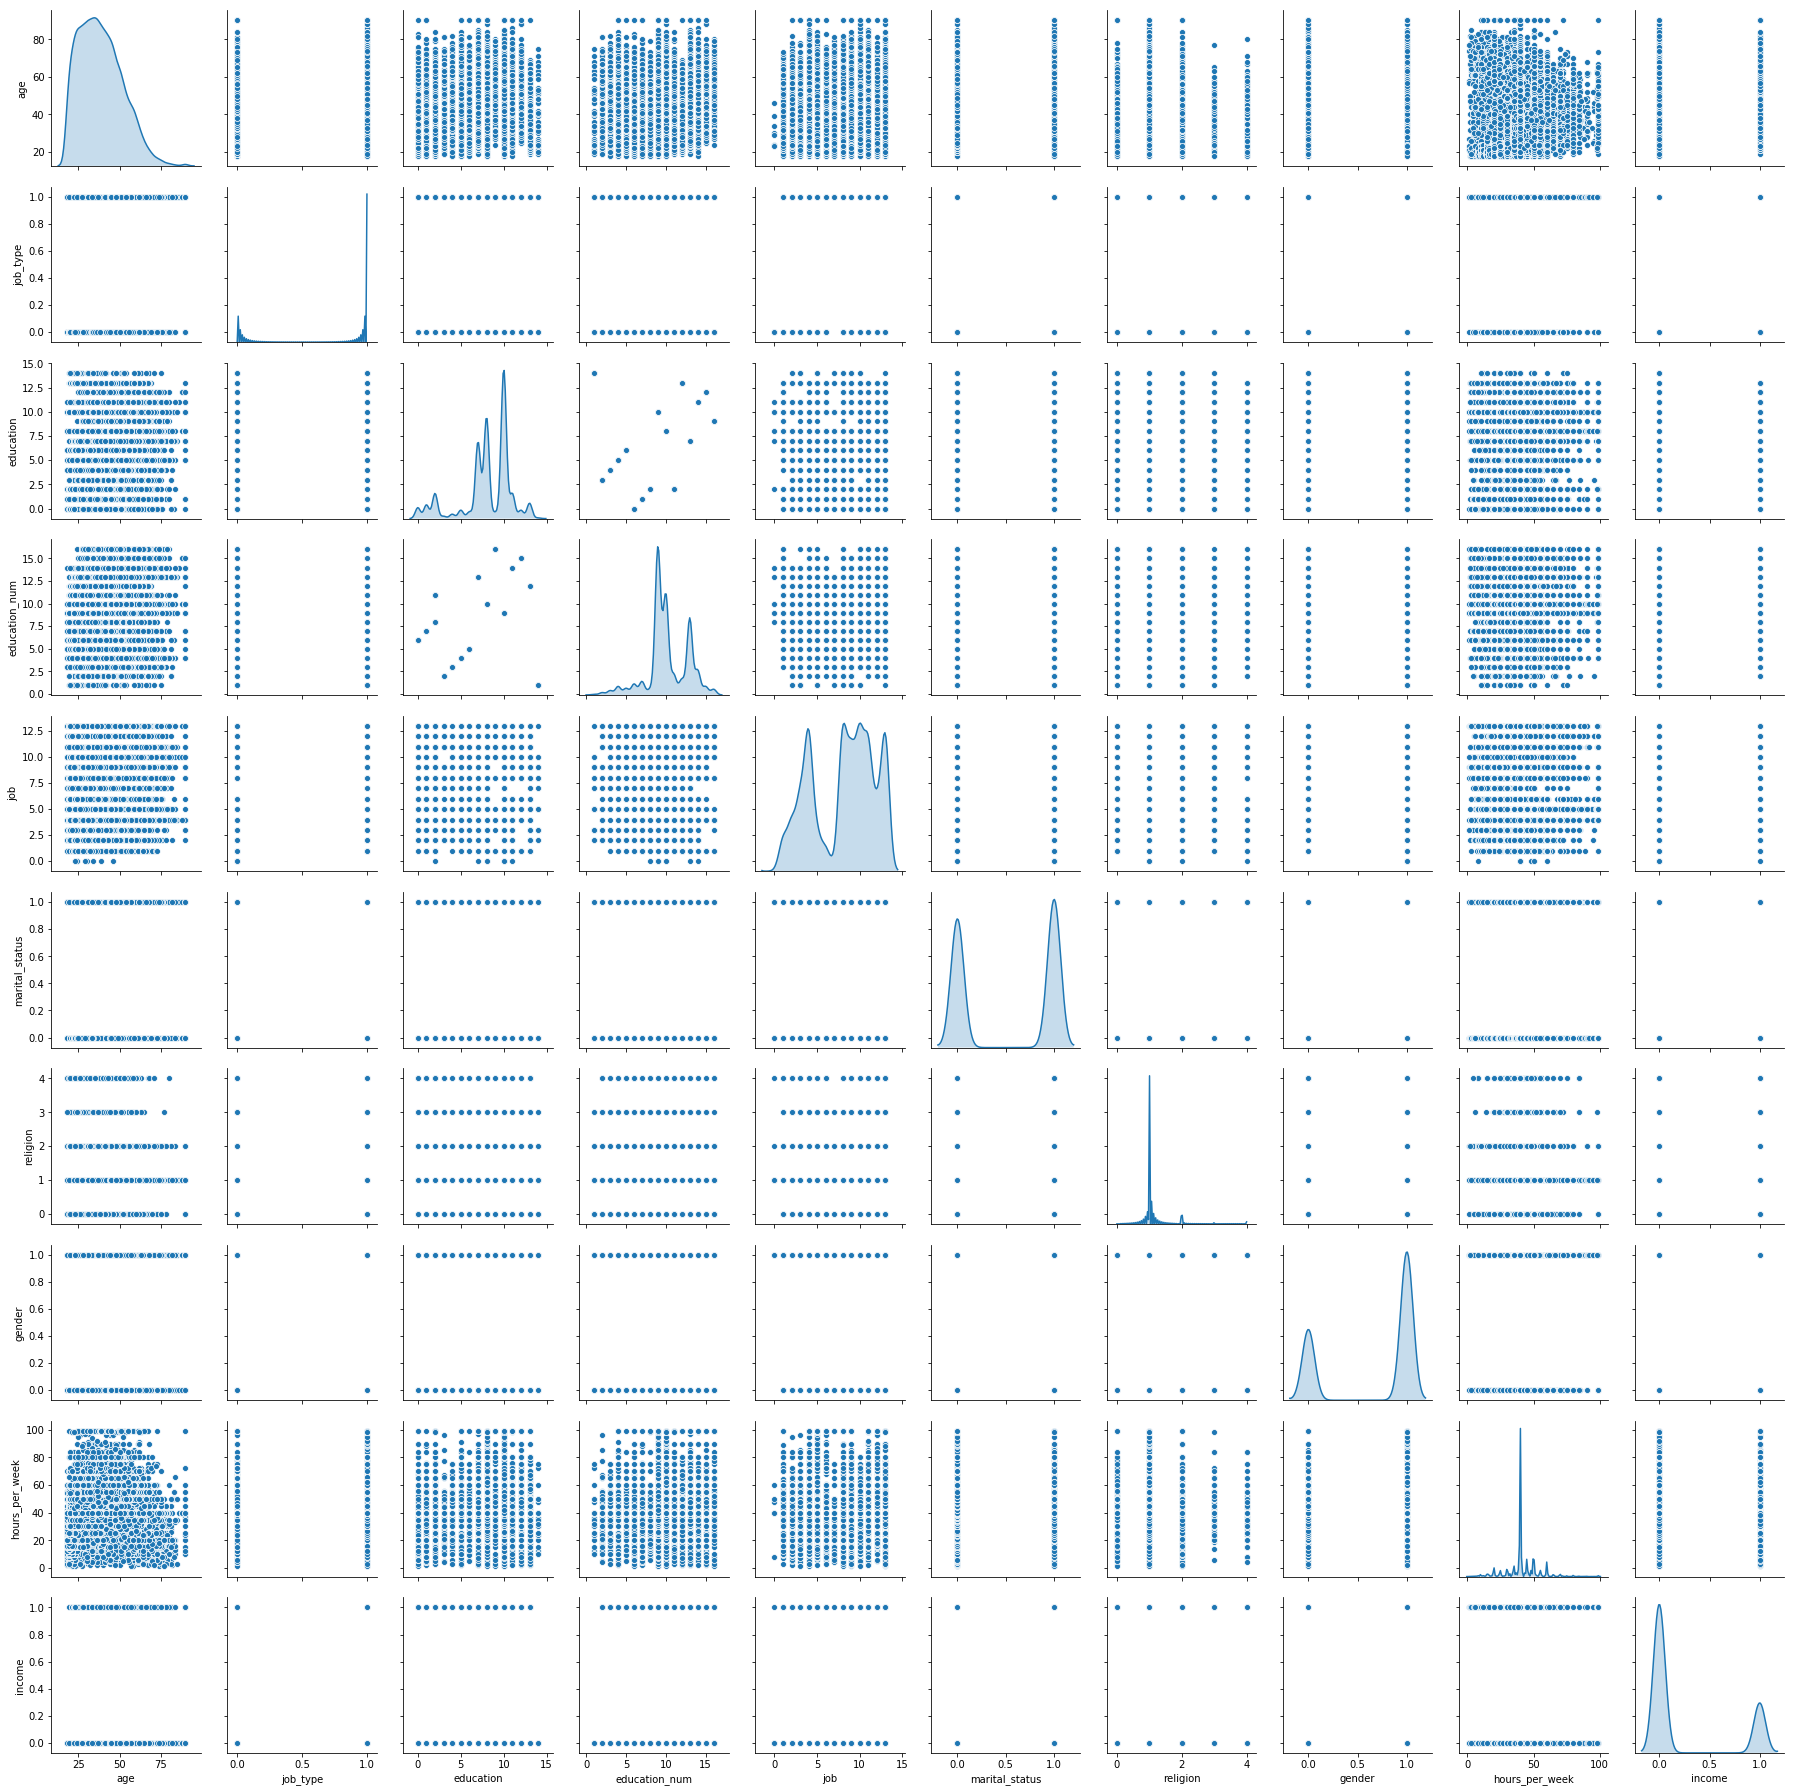

In [5]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(data , diag_kind = 'kde')

We can observe obnormality in age, hours_per_week and income

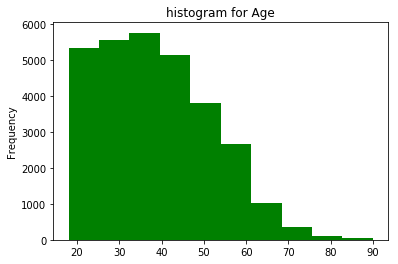

In [15]:
data.age.plot(kind='hist', title='histogram for Age', color='green')
#right Skewed

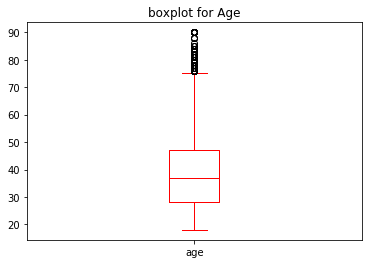

In [16]:
data.age.plot(kind='box', title='boxplot for Age', color ='red')
#outliers

In [26]:
#outlier treatment
import matplotlib.pyplot as plt
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
df1 = data[(data.age >= Q1 - 1.5*IQR) & (data.age <= Q3 + 1.5*IQR)]

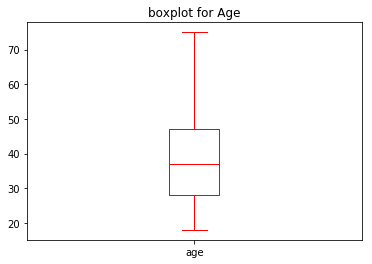

In [48]:
#After outlier treatment
df1.age.plot(kind='box', title='boxplot for Age', color ='red')

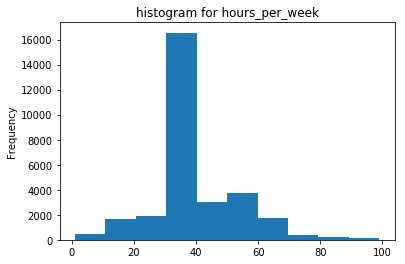

In [4]:
data.hours_per_week.plot(kind='hist', title='histogram for hours_per_week')
#distribution is not normal

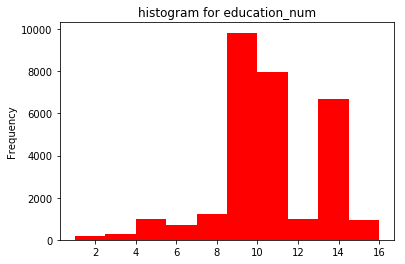

In [5]:
data.education_num.plot(kind='hist', title='histogram for education_num', color='red')
#little left skewed

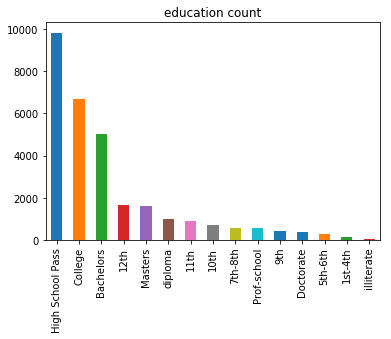

In [6]:
#bar chart of education
data.education.value_counts().plot(kind="bar", title='education count')

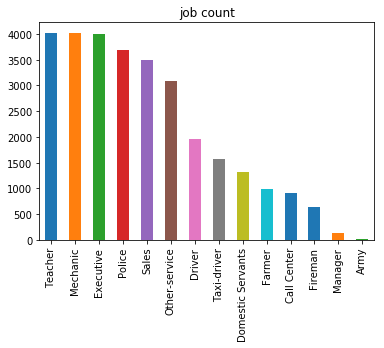

In [7]:
#bar chart of job
data.job.value_counts().plot(kind="bar", title='job count')

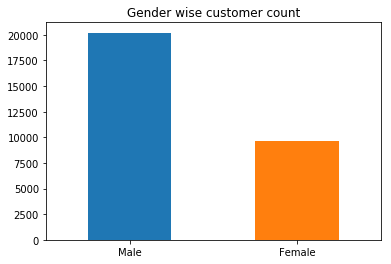

In [8]:
#bar chart of gender
data.gender.value_counts().plot(kind="bar",rot = 0, title='Gender wise customer count')

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


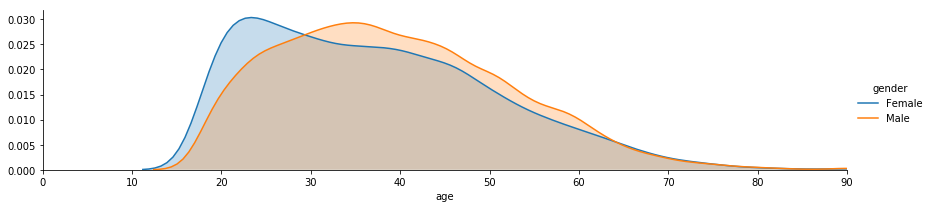

In [20]:
import seaborn as sns
facet = sns.FacetGrid(data, hue="gender",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, data['age'].max()))
facet.add_legend();
 


In [4]:
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only applying for columns with categorical strings
        data[feature] = pd.Categorical(data[feature]).codes # Replaces strings with an integer

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


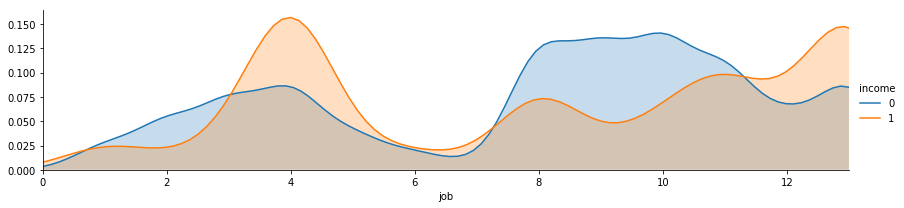

In [22]:
facet = sns.FacetGrid(data, hue="income",aspect=4)
facet.map(sns.kdeplot,'job',shade= True)
facet.set(xlim=(0, data['job'].max()))
facet.add_legend();
 

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


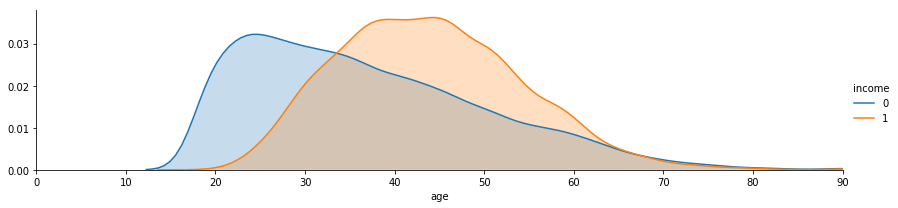

In [23]:
facet = sns.FacetGrid(data, hue="income",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, data['age'].max()))
facet.add_legend();
 

## Question 2. Build a Random Forest model to predict Income 

In [28]:
x_labels = df1.drop(labels = "income", axis = 1)
x_labels.shape

(29665, 9)

In [29]:
from scipy.stats import zscore
x= x_labels.apply(zscore)
x.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week
0,0.678342,0.409043,-2.728149,-1.64709,-1.130528,0.931831,6.05484,-1.448060,0.321168
1,0.124288,0.409043,-2.728149,-1.64709,-0.027134,0.931831,6.05484,0.690579,-0.104469
2,-0.667219,0.409043,-2.728149,-1.64709,0.248715,0.931831,6.05484,0.690579,-0.104469
3,-0.904671,0.409043,-2.728149,-1.64709,1.076260,0.931831,6.05484,0.690579,2.874992
4,-0.034014,0.409043,-2.728149,-1.64709,-1.406376,0.931831,-2.31871,-1.448060,-0.104469


In [31]:
y = df1["income"]
y.shape

(29665,)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.73, random_state=41)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 650, random_state=1)
rfcl = rfcl.fit(X_train, y_train)

In [40]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.8037957148134466

## Question 3. Build a Gradient Boosting model to predict Income

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [50]:
test_pred = gbcl.predict(X_test)
gbcl.score(X_test , y_test)

0.8291004802364241

We can observe ab increase in accuracy percentage

## Question 4. Improve the accuracy by optimizing hyperparameters of the models

In [102]:
#For random forest

In [91]:
from pprint import pprint

In [93]:
print('Parameters currently in use:\n')
pprint(rfcl.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 650,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


### RandomSearchCV

In [94]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [97]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [98]:
# Now use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rfcl, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.4s finished


In [99]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [100]:
best_random = rf_random.best_estimator_

best_random.score(X_test ,y_test)

0.8204709234120999

In [101]:
# This is the best the randomizedsearchCV could do given the range of values submitted.
#The accuracy is increased by 2%

We can also use GridCV when data takes very high computational time

### GridCV

In [11]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [20]:
rf = RandomForestClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [21]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [22]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 7}

In [23]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.8198424669012905

In [53]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if print(FeatureImportance):
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [57]:
predictors = [x for x in x.columns if x not in [y, y]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, x, y)

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

## Question 5. Find the important variables 

In [95]:
print (pd.DataFrame(gbcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                     Imp
age             0.081884
job_type        0.000954
education       0.000505
education_num   0.298453
job             0.033529
marital_status  0.509299
religion        0.003826
gender          0.004627
hours_per_week  0.066924


In [96]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                     Imp
age             0.305981
job_type        0.023510
education       0.044654
education_num   0.118446
job             0.134253
marital_status  0.163886
religion        0.031744
gender          0.028860
hours_per_week  0.148667


So, from both randomforest and gradientboost age, education_num, marital_status & hours_per_week are most important features

## Question 6. Comparison of the models performance and suggest the best model

Lets try other models before comparing

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.7646639852522206

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [119]:
bgcl = BaggingClassifier(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train,y_train)
print("bgcl on train data ", bgcl.score(X_train,X_train))
print("bgcl on test data ", bgcl.score(X_test,y_test))
print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9748575259805565
bgcl on test data  0.797804591922239
out of bag score 0.7874622862889709


Ensemble Learning - AdaBoosting

In [33]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators=50, random_state=1)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(X_train, y_train)
test_pred = abcl.predict(X_test)
abcl.score(X_test , y_test)

0.8243673537791185

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=1)
lrcl = LogisticRegression(random_state=1)
rfcl = RandomForestClassifier(random_state=1)
nbcl = GaussianNB()
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50 , random_state=1)  
enclf = VotingClassifier(estimators = [('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl)], voting = 'hard')

In [21]:
for clf, label in zip([lrcl , rfcl, nbcl, enclf, bgcl], ['Logistic Regression', 'RandomForest', 'NaiveBayes', 'Ensemble', 'Bagging']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

Accuracy: 0.81 (+/- 0.01) [Logistic Regression]


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.80 (+/- 0.01) [RandomForest]
Accuracy: 0.78 (+/- 0.01) [NaiveBayes]


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: 

Accuracy: 0.81 (+/- 0.01) [Ensemble]
Accuracy: 0.81 (+/- 0.01) [Bagging]


Even though we are getting almost similar accuracy's and little high in logistic but we better go with the ensemble technique i.e GradientBoosting or randomforest after ramdomsearchCV it gave best accuracy. Thus, it can optimise bias and variance errors in single shot.